In [4]:
import mpmath as mp

from code.python.mpmath_integration import quad_phi

In [70]:
x = mp.mpf('1/2')
alpha = mp.mpf('5')
beta = mp.mpf('1/2')
mu = mp.mpf('1')
delta = mp.mpf('4')

xmu = x - mu

gamma = mp.sqrt(alpha ** 2 - beta ** 2)
omega = mp.sqrt(xmu ** 2 + delta ** 2)

### 1. Expansion a -> 0

In [4]:
a = x-mu
b = -beta

In [5]:
def normcdf(x):
    return mp.erfc(-x / mp.sqrt(mp.mpf('2'))) / mp.mpf('2')

In [6]:
t = 1

normcdf(a / mp.sqrt(t) + b * mp.sqrt(t))

mpf('0.15865525393145707')

In [7]:
normcdf(b * mp.sqrt(t))

mpf('0.30853753872598694')

In [8]:
A = mp.exp(-b**2/2 * t) / mp.sqrt(2*mp.pi) / mp.sqrt(t)

In [9]:
s1 =  a
s2 = -a**2 * b / 2
s3 =  a**3 * (b**2 * t - 1) / t / 6
s4 = -a**4 * (b**3 * t - 3 * b) / t / 24
s5 =  a**5 * (b**4 * t**2 - 6 * b**2 * t + 3) / t**2 / 120
s6 = -a**6 * (b**5 * t**2 - 10 * b**3 * t + 15 * b) / t**2 / 720

S = s1 + s2 + s3 + s4 + s5 + s6

normcdf(b * mp.sqrt(t)) + A * S

mpf('0.15865406334063137')

In [10]:
s1, s2, s3, s4, s5, s6

(mpf('-0.5'),
 mpf('0.0625'),
 mpf('0.015625'),
 mpf('-0.0035807291666666665'),
 mpf('-0.00040690104166666668'),
 mpf('0.00013631184895833334'))

In [11]:
print(
    1,
    b,
    (b**2 * t - 1) / t,
    (b**3 * t - 3 * b) / t,
    (b**4 * t**2 - 6 * b**2 * t + 3) / t**2,
    (b**5 * t**2 - 10 * b**3 * t + 15 * b) / t**2
)

1 -0.5 -0.75 1.375 1.5625 -6.28125


In [12]:
def P(k, t, b):
    s = 0
    for m in range(int(mp.floor(k/2)) + 1):
        s += (-1) ** m / mp.factorial(m) / mp.factorial(k - 2 * m) * b ** (k - 2*m) / 2 ** m / t ** m

    return mp.factorial(k) * s

In [13]:
k = 0
P(k, t, b)

mpf('1.0')

In [14]:
K = 10
S = 0
for k in range(1, K):
    S += (-1) ** (k + 1) * a ** k / mp.factorial(k) * P(k-1, t, b)

normcdf(b * mp.sqrt(t)) + A * S

mpf('0.1586552237628216')

Hermite probabilistic

In [15]:
def hermite_prob(k, z):
    s = 0
    for m in range(int(mp.floor(k/2)) + 1):
        s += (-1) ** m / mp.factorial(m) / mp.factorial(k - 2 * m) * z ** (k - 2*m) / 2 ** m

    return mp.factorial(k) * s    

In [16]:
k = 10

P(k, t, b)

mpf('49.043945312499915')

In [17]:
hermite_prob(k, b * mp.sqrt(t)) / t ** (k / 2)

mpf('49.043945312499915')

In [18]:
mp.hermite(k, b * mp.sqrt(t / 2)) / (2 * t) ** (k / 2)

mpf('49.043945312500114')

In [19]:
K = 40
S = 0
for k in range(1, K):
    S += (-1) ** (k + 1) * a ** k / mp.factorial(k) * mp.hermite(k-1, b * mp.sqrt(t / 2)) / (2 * t) ** ((k-1) / 2)

normcdf(b * mp.sqrt(t)) + A * S

mpf('0.15865525393145707')

In [20]:
K = 40
S = 0
for k in range(K):
    S += (-1) ** k * a ** (k + 1) / mp.factorial(k + 1) * mp.hermite(k, b * mp.sqrt(t / 2)) / (2 * t) ** (k / 2)

normcdf(b * mp.sqrt(t)) + A * S

mpf('0.15865525393145707')

### 2. Expansion

In [71]:
mp_result = quad_phi(x, alpha, beta, mu, delta, digits=100)
mp_result

mpf('0.1554270837248255343689904158621173574167549484033297369417738247473247052687011635448439251317681187645')

In [72]:
quad_phi(mu, alpha, beta, mu, delta, digits=100)

mpf('0.328142521756511951411719012515012703253373835245640592443114506327407745637481448256642794930771303496')

In [23]:
C = delta * mp.exp(delta * gamma) / (2 * mp.pi)

In [24]:
mp.mp.dps = 100

N = 50
s = 0
for k in range(N):
    r = (-1) ** k * xmu ** (k + 1) / mp.factorial(k + 1) / 2 ** (k / 2)
    q = mp.quad(lambda t: t ** (-k/2 - 2) * mp.hermite(k, b * mp.sqrt(t / 2)) * mp.exp(-delta ** 2 / 2 / t - alpha ** 2 / 2 * t), [0, mp.inf])
    s += r * q

C * s

mpf('-0.1727154380316863885183617112734405306940970622583268681959505292277389686830570764622840050816269991251')

In [25]:
r1 = quad_phi(mu, alpha, beta, mu, delta, digits=100) + C * s

In [26]:
r1, mp_result

(mpf('0.1554270837248255628933573012415721725592767729873137242471639770996687769544243717943587898491443043709'),
 mpf('0.1554270837248255343689904158621173574167549484033297369417738247473247052687011635448439251317681187645'))

##### Coefficients recursion

Ik+1

In [ ]:
k = 1
mp.quad(lambda t: t ** (-(k+1)/2 - 2) * mp.hermite(k+1, b * mp.sqrt(t / 2)) * mp.exp(-delta ** 2 / 2 / t - alpha ** 2 / 2 * t), [0, mp.inf])

In [ ]:
mp.quad(lambda t: t ** (-(k+1)/2 - 2) * (2 * b * mp.sqrt(t / 2) * mp.hermite(k, b * mp.sqrt(t / 2)) -2*k *  mp.hermite(k-1, b * mp.sqrt(t / 2)))  * mp.exp(-delta ** 2 / 2 / t - alpha ** 2 / 2 * t), [0, mp.inf])

Ik

In [ ]:
Ik = mp.quad(lambda t: t ** (-k/2 - 2) * mp.hermite(k, b * mp.sqrt(t / 2)) * mp.exp(-delta ** 2 / 2 / t - alpha ** 2 / 2 * t), [0, mp.inf])
Ik, Ik * b * mp.sqrt(2)

Ik-1

In [ ]:
-2*k * mp.quad(lambda t: t ** (-(k+1)/2 - 2) * (mp.hermite(k-1, b * mp.sqrt(t / 2)))  * mp.exp(-delta ** 2 / 2 / t - alpha ** 2 / 2 * t), [0, mp.inf])

In [ ]:
mp.quad(lambda t: t ** (-(k+1)/2 - 2) * (mp.hermite(k-1, b * mp.sqrt(t / 2)))  * mp.exp(-delta ** 2 / 2 / t - alpha ** 2 / 2 * t), [0, mp.inf])

In [ ]:
z = alpha ** 2 / 2
r = delta / alpha

In [ ]:
I11 = mp.quad(lambda t: t ** (-(k+1)/2 - 2 + 2) * (mp.hermite(k-1, b * mp.sqrt(t / 2)))  * mp.exp(-z * (t + r ** 2 / t)), [0, mp.inf])

In [ ]:
I12 = mp.quad(lambda t: t ** (-(k+1)/2 - 2 + 2) * (mp.hermite(k-1, b * mp.sqrt(t / 2))) * 1/z * z * (r**2/t**2 - 1) * mp.exp(-z * (t + r ** 2 / t)), [0, mp.inf])

In [ ]:
(I11 + I12) / r ** 2

In [ ]:
I11, I12

In [ ]:
mp.quad(lambda t: t ** (-k/2 + 3/2 - 2) * (mp.hermite(k-1, b * mp.sqrt(t / 2)))  * mp.exp(-z * (t + r ** 2 / t)), [0, mp.inf])

##### Coefficient finite series

In [26]:
k = 3
mp.quad(lambda t: t ** (-k/2 - 2) * mp.hermite(k, b * mp.sqrt(t / 2)) * mp.exp(-delta ** 2 / 2 / t - alpha ** 2 / 2 * t), [0, mp.inf])

mpf('0.00000000787187474582876362098640050815035512668242480669280099020402751234395765083787946872163432080364454461')

In [27]:
s = 0
for j in range(int(mp.floor(k/2)) + 1):
    s += (-1) ** j / mp.factorial(j) / mp.factorial(k - 2 * j) * (alpha / delta / beta ** 2 / 2) ** j * mp.besselk(j+1, alpha * delta)

2 * mp.factorial(k) * s * (alpha / delta) * (b * mp.sqrt(2)) ** k 

mpf('0.00000000787187474582876362098640050815035512668242480669280099020402751234395765083787946872163432080364454461')

In [28]:
j = 4
mp.quad(lambda t: t ** (-j - 2) * mp.exp(-delta ** 2 / 2 / t - alpha ** 2 / 2 * t), [0, mp.inf])

mpf('0.000000006432287683089741882268625321096774185073826493223457816915269042648168288793850284049028980229857361478')

In [29]:
2 * (alpha / delta) ** (j + 1) * mp.besselk(j+1, alpha * delta)

mpf('0.000000006432287683089741882268625321096774185073826493223457816915269042648168288793850284049028980229857361478')

#### Final expansion

In [27]:
N = 66

In [28]:
def Ak(k):
    s = 0
    for j in range(int(mp.floor(k/2)) + 1):
        s += (-1) ** j / mp.factorial(j) / mp.factorial(k - 2 * j) * (alpha / 2 / delta / beta ** 2) ** j * mp.besselk(j+1, alpha * delta)
    return s

In [29]:
s = 0
for k in range(N):
    s += (beta * (x-mu)) ** k / (k + 1) * Ak(k)

quad_phi(mu, alpha, beta, mu, delta, digits=100) + mp.exp(delta * gamma) * (x-mu) * alpha / mp.pi * s 

mpf('0.1554270837248255749217736224925765573112435404442983807411583080057858877030136380364619273849091060598')

In [30]:
r2 = quad_phi(mu, alpha, beta, mu, delta, digits=100) + mp.exp(delta * gamma) * (x-mu) * alpha / mp.pi * s 

In [31]:
r2, mp_result

(mpf('0.1554270837248255749217736224925765573112435404442983807411583080057858877030136380364619273849091060598'),
 mpf('0.1554270837248255343689904158621173574167549484033297369417738247473247052687011635448439251317681187645'))

In [32]:
float(abs(r2 / mp_result - 1))

2.609119481288523e-16

cache version

In [128]:
cache = {
    0: mp.besselk(0, alpha * delta),
    1: mp.besselk(1, alpha * delta),
    2: mp.besselk(2, alpha * delta)
}

In [129]:
cache[0] + 2/alpha/delta * cache[1]

mpf('0.0000000006329543612292228110481730278777254835597466965580820785850086943889780395876215966640115483295509048658')

In [130]:
def Ak(k):
    u = 1.0
    z = (-alpha / 2 / delta / beta ** 2)
    s = 0
    print('floor: ', int(mp.floor(k/2)) + 1)
    for j in range(int(mp.floor(k/2)) + 1):
        if j + 1 not in cache:
            cache[j+1] = cache[j-1] + 2 * j / alpha / delta * cache[j]
            print(f'bessel j + 1 = {j+1}', float(cache[j+1] * mp.exp(alpha * delta)), float(mp.besselk(j+1, alpha * delta) * mp.exp(alpha * delta)))

        print(j+1, float(cache[j+1]))
        f = 1 / mp.factorial(j) / mp.factorial(k - 2 * j)

        print(f'j={j}, f={float(f)}')
        
        # print(u, z ** j)
        s += f * u * cache[j+1]
        u *= z
    return s

In [131]:
# k = 7
# for j in range(int(mp.floor(k/2)) + 1):
#     f = 1 / mp.factorial(j) / mp.factorial(k - 2 * j)
#     print(f'j={j}, f={f}')    

In [132]:
# k = 7
# f = 1 / mp.factorial(k)
# print(f'j=0, f={f}')
# for j in range(1, int(mp.floor(k/2)) + 1):
#     f *= (2.0 * j - k - 1) * (2.0 * j - k - 2) / j;
#     print(f'j={j}, f={f}')    

In [133]:
N = 20
s = 0
for k in range(N):
    print(k, '-----------------')
    ak = Ak(k)
    print(k, 'sA', float(ak))
    s += (beta * (x-mu)) ** k / (k + 1) * ak
    print(k, 's', float(s))

mp.exp(delta * gamma) * (x-mu) * alpha / mp.pi * s 

0 -----------------
floor:  1
1 5.883057969557038e-10
j=0, f=1.0
0 sA 5.883057969557038e-10
0 s 5.883057969557038e-10
1 -----------------
floor:  1
1 5.883057969557038e-10
j=0, f=1.0
1 sA 5.883057969557038e-10
1 s 5.147675723362408e-10
2 -----------------
floor:  2
1 5.883057969557038e-10
j=0, f=0.5
2 6.329543612292228e-10
j=1, f=1.0
2 sA -1.2882330045952052e-09
2 s 4.879293847405074e-10
3 -----------------
floor:  2
1 5.883057969557038e-10
j=0, f=0.16666666666666666
2 6.329543612292228e-10
j=1, f=1.0
3 sA -1.484334936913773e-09
3 s 4.937275680878268e-10
4 -----------------
floor:  3
1 5.883057969557038e-10
j=0, f=0.041666666666666664
2 6.329543612292228e-10
j=1, f=0.5
bessel j + 1 = 3 0.3468429822109774 0.3468429822109774
3 7.148966692015483e-10
j=2, f=0.5
4 sA 1.4673718812581311e-09
4 s 4.948739523700597e-10
5 -----------------
floor:  3
1 5.883057969557038e-10
j=0, f=0.008333333333333333
2 6.329543612292228e-10
j=1, f=0.16666666666666666
3 7.148966692015483e-10
j=2, f=0.5
5 sA 1.975

mpf('-0.1727154380316864792654999019734816734722948468849094511223123492050000668864980935631087446387567549447')

In [135]:
C = mp.exp(delta * gamma) * (x-mu) * alpha / mp.pi
C

mpf('-349253852.9667442156569606495726521176737569493562398415082806071966090339680234840621122446708905460011')

In [134]:
s

mpf('0.0000000004945269366810174043336543886321126845707763750372031140793050257150416955369671449033415141841909165787')

In [124]:
cache[3]

mpf('0.0000000007148966692015483799746628227298261509451759410950879440083876805284684612508355284580252578473566680023')

In [125]:
quad_phi(mu, alpha, beta, mu, delta, digits=100) + mp.exp(delta * gamma) * (x-mu) * alpha / mp.pi * s 

mpf('0.1554270790994329564898842291575091537359481071877430101786928213695531612725956880332964235802065878843')

In [126]:
mp_result

mpf('0.1554270837248255343689904158621173574167549484033297369417738247473247052687011635448439251317681187645')

In [76]:
k = 20
j = 1
1 / mp.factorial(j) / mp.factorial(k - 2 * j)

mpf('0.0000000000000001561920696858622646221636435005733342351940408446961685541067911299954734612548355329418371919322916999')

In [77]:
t0 = 1 / mp.factorial(0) / mp.factorial(k - 2 * 0)

In [89]:
j = 10
(2*j - 2 - k) *(2*j - k - 1) / j * t0

mpf('0.00000000000000000008220635246624330173292907629243931809029120574458175481816490770429720928698947456807975934404933554928')

In [90]:
(2*j - 2 - k) *(2*j - k - 1) / j 

0.2

Complexity

In [11]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
def complexity_hermite(N):
    t1 = mp.floor((N - 1) / 2) * (mp.floor((N - 1) / 2) + 1)
    t2 = mp.floor(N / 2) * (mp.floor(N / 2) + 1)
    t3 = 2*(N + 1)

    return int(t1 + t2 + t3) // 2


def complexity_bessel(N):
    return (N + 1) * (N + 2)

In [8]:
N = 30
complexity_hermite(66), complexity_bessel(29)

(1156, 930)

In [16]:
ch = [complexity_hermite(N) for N in range(10000)]
cb = [complexity_bessel(N) for N in range(10000)]

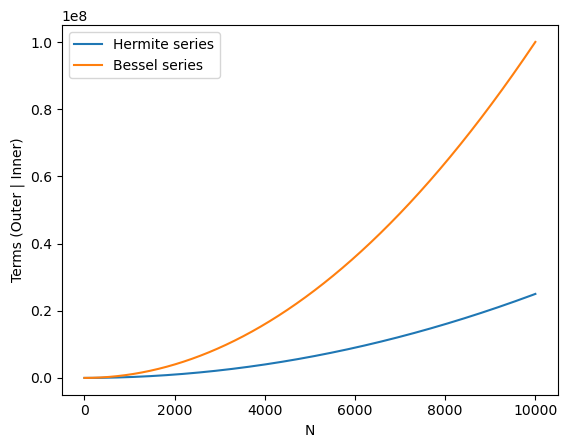

In [17]:
plt.plot(ch, label='Hermite series')
plt.plot(cb, label='Bessel series')

plt.xlabel('N')
plt.ylabel('Terms (Outer | Inner)')

plt.legend()
plt.show()

In [18]:
np.array(cb) / np.array(ch)

array([2.        , 3.        , 3.        , ..., 3.9996    , 3.9996    ,
       3.99960008])